In [28]:
import pandas as pd
import numpy as np
import seaborn as sns


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_csv('./../../communal/Ames_Housing_Price_Data_cleaned_2.csv')

# 1st + 2nd = Gr, Gr has a hgigher correlation with SalePrice when just considering SF of house

 Should we drop 1st and second and just use Gr? Is this enough to justify dropping the 1st and 2nd?



<AxesSubplot:>

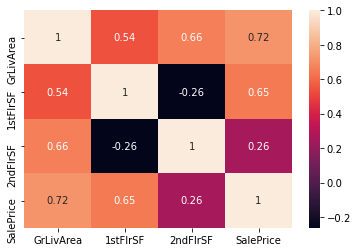

In [15]:
data.filter(regex = 'SF|Gr')
sns.heatmap(data[['GrLivArea','1stFlrSF','2ndFlrSF','SalePrice']].corr(), annot = True)

In [9]:
data.filter(regex= 'Bsmt')

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,1.0,0.0
1,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,1.0,0.0
2,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,1.0,0.0
3,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,0.0,0.0
4,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2619,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,0.0,0.0
2620,None,None,None,None,0.0,None,0.0,0.0,0.0,0.0,0.0
2621,TA,TA,No,BLQ,284.0,Unf,0.0,717.0,1001.0,0.0,0.0
2622,Gd,TA,No,GLQ,841.0,Unf,0.0,144.0,985.0,1.0,0.0


# Same with basement finish
Shoud we drop all partial areas and use the full area columns?

<AxesSubplot:>

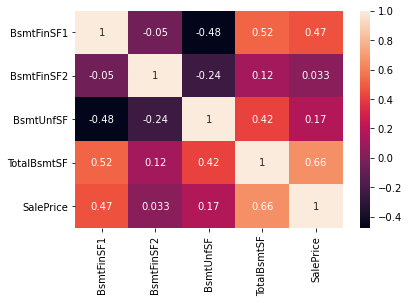

In [16]:
sns.heatmap(data[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','SalePrice']].corr(),annot = True)

In [24]:
# for c in data.columns:
# #     print(f'****** {c} ******')
# #     print(data[c].value_counts()/len(data))
# #     print()

# Mapping ordinals to numbers

In [76]:
mapping_dict = {'None' : np.nan,
                'Po' :  1,
                'Fa' : 2,
                'TA' : 3,
                'Gd' : 4,
                'Ex' : 5}

In [77]:
ordinals = ['BsmtQual','BsmtCond',
            'ExterQual','ExterCond',
            'KitchenQual','GarageQual',
            'GarageCond', 'HeatingQC']

In [78]:
data[ordinals] = data[ordinals].applymap(mapping_dict.get)

# Mapping Ordinals to Numbers Part 2

In [ ]:
#      GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement
p2_dict = {''}

# Just For Fun drooping hella data

In [46]:
len(data.columns)

86

In [50]:
# "Dropping all categorical values that have super uneven spread

data.drop(['PID','Street', 'Alley','LandContour', 
           'Utilities','LandSlope', 'Condition2','RoofMatl', 
           'Heating','CentralAir', 'Electrical',
          'BsmtHalfBath','KitchenAbvGr','Functional','3SsnPorch', 
           'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal',
           'SaleType','SaleCondition'], axis = 1,inplace = True)

In [51]:
len(data.columns)

65

In [66]:
data.drop(['1stFlrSF','2ndFlrSF', 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis = 1, inplace = True)

In [71]:
len(data.columns)

61

In [74]:
data.filter(regex = 'Style')

,HouseStyle,RoofStyle
0,1Story,Gable
1,1Story,Gable
2,1Story,Gable
3,1Story,Hip
4,2Story,Gable
5,2Story,Gable
6,SFoyer,Gable
7,1Story,Gable
8,1Story,Gable
9,1Story,Gable


Lets inspect what has higher correlation with price, GrSF, or Total SF, (below and above ground)

In [53]:
data['tsf'] = data.GrLivArea + data.TotalBsmtSF

<AxesSubplot:>

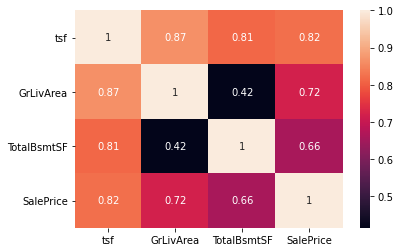

In [63]:
# Drop columns that are linearly dependant
# FirstFloorSF + SEcondFlrSF = GrLivArea
#TSF 

sns.heatmap(data[['tsf','GrLivArea','TotalBsmtSF', 'SalePrice']].corr(), annot = True)

In [84]:
data.head()

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,LowQualFinSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,lot_bucket,mean_LotFrontage,Prop_Addr,lat,long,tsf
0,856,126000,30,RL,64.9,7890,Reg,Corner,SWISU,Norm,1Fam,1Story,6,6,1939,1950,Gable,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,3.0,3.0,No,Rec,Unf,856.0,3,0,1.0,1,0,2,3,4,1,Gd,Detchd,1939.0,Unf,2.0,399.0,3.0,3.0,Y,0,0,0,166,None,3,2010,"(7298.458, 8298.201]",64.93913,436 HAYWARD AVE,42.017780,-93.651452,1712.0
1,1049,139500,120,RL,42.0,4235,Reg,Inside,Edwards,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,HdBoard,HdBoard,BrkFace,149.0,4,3,CBlock,4.0,3.0,Mn,GLQ,ALQ,1049.0,3,0,1.0,2,0,2,4,5,0,None,Attchd,1984.0,Fin,1.0,266.0,3.0,3.0,Y,0,105,0,0,None,2,2009,"(3299.486, 4299.229]",46.15493,3416 WEST ST,42.024697,-93.664186,2098.0
2,1049,139500,120,RL,42.0,4235,Reg,Inside,Edwards,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,HdBoard,HdBoard,BrkFace,149.0,4,3,CBlock,4.0,3.0,Mn,GLQ,ALQ,1049.0,3,0,1.0,2,0,2,4,5,0,None,Attchd,1984.0,Fin,1.0,266.0,3.0,3.0,Y,0,105,0,0,None,2,2009,"(3299.486, 4299.229]",46.15493,3416 WEST ST,42.024697,-93.664186,2098.0
3,1001,124900,30,C (all),60.0,6060,Reg,Inside,IDOTRR,Norm,1Fam,1Story,5,9,1930,2007,Hip,MetalSd,MetalSd,None,0.0,4,3,BrkTil,3.0,3.0,No,ALQ,Unf,837.0,5,0,0.0,1,0,2,4,5,0,None,Detchd,1930.0,Unf,1.0,216.0,3.0,1.0,N,154,0,42,0,None,11,2007,"(5298.972, 6298.715]",54.06015,320 S 2ND ST,42.021389,-93.614855,1838.0
4,1039,114000,70,RL,80.0,8146,Reg,Corner,OldTown,Norm,1Fam,2Story,4,8,1900,2003,Gable,MetalSd,MetalSd,None,0.0,4,4,BrkTil,2.0,3.0,No,Unf,Unf,405.0,4,0,0.0,1,0,2,3,6,0,None,Detchd,1940.0,Unf,1.0,281.0,3.0,3.0,N,0,0,168,111,None,5,2009,"(7298.458, 8298.201]",64.93913,1524 DOUGLAS AVE,42.038070,-93.612065,1444.0


In [83]:
data[ordinals].filter()

BsmtQual        70
BsmtCond        70
ExterQual        0
ExterCond        0
KitchenQual      0
GarageQual     131
GarageCond     131
HeatingQC        0
dtype: int64

In [80]:
from sklearn.feature_selection import f_regression

In [85]:
F_values, p_values = f_regression(data[ordinals], data['SalePrice'])

pd.Series(p_values, index=data[ordinals].columns).sort_values()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [86]:
data.head()

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,LowQualFinSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,lot_bucket,mean_LotFrontage,Prop_Addr,lat,long,tsf
0,856,126000,30,RL,64.9,7890,Reg,Corner,SWISU,Norm,1Fam,1Story,6,6,1939,1950,Gable,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,3.0,3.0,No,Rec,Unf,856.0,3,0,1.0,1,0,2,3,4,1,Gd,Detchd,1939.0,Unf,2.0,399.0,3.0,3.0,Y,0,0,0,166,None,3,2010,"(7298.458, 8298.201]",64.93913,436 HAYWARD AVE,42.017780,-93.651452,1712.0
1,1049,139500,120,RL,42.0,4235,Reg,Inside,Edwards,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,HdBoard,HdBoard,BrkFace,149.0,4,3,CBlock,4.0,3.0,Mn,GLQ,ALQ,1049.0,3,0,1.0,2,0,2,4,5,0,None,Attchd,1984.0,Fin,1.0,266.0,3.0,3.0,Y,0,105,0,0,None,2,2009,"(3299.486, 4299.229]",46.15493,3416 WEST ST,42.024697,-93.664186,2098.0
2,1049,139500,120,RL,42.0,4235,Reg,Inside,Edwards,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,HdBoard,HdBoard,BrkFace,149.0,4,3,CBlock,4.0,3.0,Mn,GLQ,ALQ,1049.0,3,0,1.0,2,0,2,4,5,0,None,Attchd,1984.0,Fin,1.0,266.0,3.0,3.0,Y,0,105,0,0,None,2,2009,"(3299.486, 4299.229]",46.15493,3416 WEST ST,42.024697,-93.664186,2098.0
3,1001,124900,30,C (all),60.0,6060,Reg,Inside,IDOTRR,Norm,1Fam,1Story,5,9,1930,2007,Hip,MetalSd,MetalSd,None,0.0,4,3,BrkTil,3.0,3.0,No,ALQ,Unf,837.0,5,0,0.0,1,0,2,4,5,0,None,Detchd,1930.0,Unf,1.0,216.0,3.0,1.0,N,154,0,42,0,None,11,2007,"(5298.972, 6298.715]",54.06015,320 S 2ND ST,42.021389,-93.614855,1838.0
4,1039,114000,70,RL,80.0,8146,Reg,Corner,OldTown,Norm,1Fam,2Story,4,8,1900,2003,Gable,MetalSd,MetalSd,None,0.0,4,4,BrkTil,2.0,3.0,No,Unf,Unf,405.0,4,0,0.0,1,0,2,3,6,0,None,Detchd,1940.0,Unf,1.0,281.0,3.0,3.0,N,0,0,168,111,None,5,2009,"(7298.458, 8298.201]",64.93913,1524 DOUGLAS AVE,42.038070,-93.612065,1444.0


In [91]:
numerics = ['YearBuilt','GarageYrBlt']

In [108]:
data.YearBuilt - data.GarageYrBlt.astype(float)

ValueError: could not convert string to float: 'None'

In [93]:
data[numerics]

,YearBuilt,GarageYrBlt
0,1939,1939.0
1,1984,1984.0
2,1984,1984.0
3,1930,1930.0
4,1900,1940.0
5,2001,2001.0
6,2003,2003.0
7,1953,1974.0
8,2007,2007.0
9,1984,1984.0


In [110]:
yr = data[numerics]

In [114]:
selected = yr[yr['GarageYrBlt'] != 'None']

In [115]:
len(selected)

2493

In [116]:
len(yr)

2624

In [124]:
(selected.iloc[:,0].astype(float) - selected.iloc[:,1].astype(float)).sum()

0.0

In [125]:
data.dtypes

GrLivArea             int64
SalePrice             int64
MSSubClass            int64
MSZoning             object
LotFrontage         float64
LotArea               int64
LotShape             object
LotConfig            object
Neighborhood         object
Condition1           object
BldgType             object
HouseStyle           object
OverallQual           int64
OverallCond           int64
YearBuilt             int64
YearRemodAdd          int64
RoofStyle            object
Exterior1st          object
Exterior2nd          object
MasVnrType           object
MasVnrArea          float64
ExterQual             int64
ExterCond             int64
Foundation           object
BsmtQual            float64
BsmtCond            float64
BsmtExposure         object
BsmtFinType1         object
BsmtFinType2         object
TotalBsmtSF         float64
HeatingQC             int64
LowQualFinSF          int64
BsmtFullBath        float64
FullBath              int64
HalfBath              int64
BedroomAbvGr        

In [127]:
data[discrete.remove('YrSold')]

NameError: name 'discrete' is not defined